# **Bootcamp de Machine Learning**

## **Validação de modelos e Data Preparation**

Podemos definir o processo de Data Preparation como o fluxo de transformação de dados brutos em dados finais mais apropriados para a criação de modelos de Machine Learning. Algumas tarefas comuns neste processo envolvem, limpeza de dados, seleção de features, transformação de dados, criação de variáveis, etc. 

Grande parte do trabalho do Cientista de Dados reside em criar boas variáveis e assegurar a qualidade dos dados.


**Etapas do processo de Data Preparation**

* Data Cleaning
    * Identificação de redundâncias e inconsistências
        * Exemplos: Valor monetário negativo (pode ou não fazer sentido a depender do contexto); Idade acima de 300 anos ou idade negativa, dentre outros exemplos.
    * Identificação/tratamento de outliers
        * Exemplos: cliente com 190 anos de idade
    * Identificação/tratamento de missing (marcação e imputação)
    
* Feature Selection
    * Como selecionar as melhores features no conjunto de 100, 500, 1000, ou 10000 features? 
    * Quais questõs poderíamos pensar de um modelo com muitas variáveis?
    
* Data Transforms
    * Discretization Transform
        * Encode de uma variável numérica em uma variável ordinal
    * Ordinal Transform
        * Encode de uma variável categórica em uma variável int
    * One Hot Transform
        * Encode de uma variável categórica em variável binária
    * Normalization Transform
        * Altera a escala da variável para um range entre 0 e 1
    * Standardization Transform
        * Distribuição Normal padrão
    * Power Transform
        * Altera a distribuição de uma variável de modo a aproximar para uma normal
        
* Feature Engineering
    * Adicionar variáveis externas
        * Exemplo: inserir variáveis macroeconômicas, sócioeconômicas, etc.
    * Adicionar novas variáveis a partir da dimensão temporal
    * Adicionar flag
    * Aplicar transformações (mínimo, máximo, média, mediana, desvio padrão, amplitude, etc.)
    * Indicadores

* Dimensionality Reduction

Assim, podemos resumir:

* Alterar a escala da variável: RobustScaler, StandardScaler, MinMaxScaler.
* Alterar a distribuição: Power Transform, Quantile Transform, Discretization
* Encode de variável categórica
    * Nominal: One Hot Encode
    * Ordinal: Label Encode

## **Data Preparation**

#### Tipos de variáveis

As variáveis podem ser mensuradas em quatro escalas distintas. As variáveis quantitativas podem ser classificadas em discretas ou contínuas, enquanto que as variáveis qualitativas podem ser agrupadas em nominais ou ordinais.

1. Variáveis qualitativas
* variável nominal: não há qualquer ordenação na distribuição dos dados (ou dentre as categorias).
    * Exemplos: gênero, cor dos olhos,região de procedência, etc.
* variável ordinal: há uma ordem dentre as categorias (escala ordinal).
    * Exemplos: escolaridade/grau de instrução, hierarquia militar, estágio de uma doença, mês de observação, etc.

2. Variáveis quantitativas
* variável discreta: seus valores podem ser oriundos de um conjunto finito ou enumerável (contagem).
    * Exemplos: número de filhos, número de refeições em um dia, etc.
* variável contínua: seus valores pertencem a um intervalo (mensuração).
    * Exemplos: temperatura, preço de uma ação, altura, peso, etc.

#### Variáveis quantitativas

MinMaxScaler
* O range de valores é alterado para $[0,1]$
* A distribuição dos dados não se altera
* Técnica sensível à outliers

Fórmula de cálculo:

$$X_{\text{new}} = \dfrac{X_i-\text{min}(X)}{\text{max}(X)-\text{min}(X)}$$


<img src="https://miro.medium.com/max/416/1*vEqbUwYneOkRQXCdPU0n9g.png" height=200 width=200/>

Implementação no sklearn: [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)


MaxAbsScaler

Fórmula de cálculo:

$$X_{\text{new}} = \dfrac{X_i}{|X_{max}|}$$

Implementação no sklearn: [sklearn.preprocessing.MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler)

Padronização (Standard Scaler)
* Os dados ficam centrados em 0, com dispersão igual a 1
* Não obteremos uma distribuição normal (caso a distribuição original não for Normal; se a distribuição original for uma Normal teremos então uma distribuição Normal padrão)
* Técnica sensível à outliers

Fórmula de cálculo: 

$$Z = \dfrac{X-\mu}{\sigma}$$


Implementação no sklearn: [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)


RobustScaler
* Robusto à outlier, sendo similar ao MinMax, mas usa os quartis Q1 e Q3 para o scaling

Fórmula de cálculo:

$$\dfrac{x_i-Q_1(X)}{Q_3(X)-Q_1(X)}$$

Implementação no sklearn: [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

PowerTransformer
* Implementa as transformações de Yeo-Johnson (para valores positivos e negativos) e Box-Cox (para valores estritamente positivos).

Implementação no sklearn: [sklearn.preprocessing.PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

#### Variáveis qualitativas


One-Hot-Encoder
* Usado para criar dummies
* Igual ao método do Pandas `pd.get_dummies()`, mas podemos usar o Sklearn por sua integração com as Pipelines
* Se a variável tiver muitas categoricas, teremos muitas colunas criadas (alta dimensionalidade)

<img src="https://i.imgur.com/TW5m0aJ.png" height=700 width=700/>

Implementação no Pandas: [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
Implementação no sklearn: []()


Ordinal-Encoder
* Usado para variáveis categóricas ordinais (nível de satisfação do usuário em uma escala de 1 a 5, em que 5 representa a satisfação máxima)

Frequency-Encoder
* Aplicação prática: coluna com muitos níveis/categorias ou se não houver grau ordinal
* Cada nível da classe será substituído por sua frequência


LabelEncoder
* Encode para os labels da variável target, com 0 a n_classes-1
* Deve ser usado para a variável target

***
Revisão

Bussab e Morettin (2010) ressaltam que tanto a média, quanto o desvio padrão podem não ser medidas suficientes para se representar um conjunto de dados, pois: 
* ambos são afetados de forma demasiada por valores extremos;
* não podemos ter uma noção clara da simetria ou assimetria da distribuição dos dados.

*  1º Quartil: 25% das observações abaixo e 75% das observações acima
*  2º  Quartil: 50% das observações abaixo e 50% das observações acima
*  3º Quartil: 75% das observações abaixo e 25% das observações acima

Então os quartis dividem o conjunto de dados em quatro partes iguais.


Um boxtpot (gráfico de caixa) fornece uma poderosa visualização da distribuição dos dados e valores discrepantes (outliers), sendo formados pelo primeiro quartil, segundo quartil (mediana), terceiro quartil e limites superior e inferior. 


***

#### **Missing handling**

Algumas técnicas de imputação de missing:
* SimpleImputer
    * Imputa pela média, mediana, constante, moda (pode alterar drasticamente a distribuição da variável)
    
* KNNImputer
    * Usa a técnica k-Nearest Neighbors para preencher os valores ausentes
* Baseada no negócio
    * Média/mediana de um grupo específico (faixa de renda)

## **Métricas de avaliação de modelos**

**Avaliação de modelos de classificação**

Vamos começar definindo os seguintes conceitos:

* Classe postiiva (1): Cliente Mau
* Classe negativa (0): Cliente Bom

Uma definição de negócio para cliente mau poderia ser, um cliente com mais de 30 dias de atraso em uma janela de três meses.

* VP: modelo acertou em dizer que era um cliente mau;
* VN: modelo acertou em dizer que era um cliente bom;
* FN: modelo errou em dizer que era um cliente mau;
* FP: modelo errou em dizer que era um cliente bom.


Acurácia


A fórmula de cálculo da acurácia é:

$$\dfrac{VP+VN}{VP+VN+FP+FN}$$

Dos verdadeiros positivos (Cliente Mau) e verdadeiros negativos (Cliente Bom) quantos o modelo acertou no total?

Ou ainda, quanto o modelo acertou das previsões totais?


Implementação no sklearn: [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

Outros aspectos da acurácia:
* Ideal para problemas de classificação com classes balanceadas

Precisão

A fórmula de cálculo da precisão é:

$$\dfrac{VP}{VP+FP}$$

De tudo que o modelo classificou como Cliente Mau, quantos realmente eram? (ocorrência do evento, classe 1)

Implementação no sklearn: [sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

Recall


De todos os exemplos que são Cliente Mau, quantos foram classificados corretamente pelo modelo?

A fórmula de cálculo do recall é:
$$\dfrac{VP}{VP+FN} $$



Implementação no sklearn: [sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)


F1-Score

* Média harmônica do Recall e Precision.

Implementação no sklearn: [sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

Matriz de confusão

Implementação no sklearn: [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)


* Indica a qualidade do modelo e agrega informações do que o modelo acertou e errou.

<img src = 'https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png' width=500 height=500>

Agora vejamos uma implementação no Sklearn.

## **Hands On!**

In [2]:
# imports
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
#from boruta import BorutaPy
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Inspeção e Limpeza de Dados

In [6]:
# proporção da variável target
df_train.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
# dtype de cada coluna
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# sumário estatístico
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
# quantidade de valores únicos em cada coluna
df_train.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [10]:
# linhas duplicadas
df_train.duplicated().sum()

0

In [11]:
# coluna constante
df_train.columns[df_train.nunique() == 1]

Index([], dtype='object')

In [12]:
# mapeia as colunas com baixa variância (técnica de seleção de variáveis)
threshold = 0.001
scaler = MinMaxScaler()
# colunas numéricas
num_cols = df_train.select_dtypes(include = [int, float])
scaled_num_cols = scaler.fit_transform(num_cols)
scaled_num_df = pd.DataFrame(scaled_num_cols,
                             columns = num_cols.columns
                            )

low_variance_columns = list()
for column in scaled_num_df:
    column_variance = scaled_num_df[column].var()
    if column_variance < threshold:
        low_variance_columns.append(column)

In [13]:
# para o threshold definido não identificamos nenhuma coluna com baixa variância
low_variance_columns

[]

***
Tarefa: transforme o código anterior em uma função.

***

In [14]:
# verifica missing values
(df_train.isna().sum()/df_train.shape[0] * 100).round(2).sort_values()

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.22
Age            19.87
Cabin          77.10
dtype: float64

Temos três colunas com missing values.

Antes de proceder vamos separar os dados em treino e teste.

In [15]:
SEED = 999999
train, test = train_test_split(
                df_train,
                test_size = 0.3,
                random_state = SEED
                    )

In [16]:
(train.isna().sum()/train.shape[0] * 100).round(2).sort_values()

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
Age            20.22
Cabin          78.17
dtype: float64

In [17]:
def clean_nan(df):
    # imputa os valores ausentes pela moda
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().squeeze())
    # Se possui Cabine 1, 0 caso contrário
    df['Cabin'] = np.where(df.Cabin.isna(), 0, 1)
    # imputa os valores ausentes de idade pela categoria de Sexo e Sobrevivência
    df['category'] = df['Sex'] + '-' + df['Pclass'].astype(str)
    categories = dict()
    for i in df.category.unique():
        filtered_data = df.loc[df.category == i]
        median = filtered_data.Age.median()
        categories[i] = median

    nan_values = df.Age.isna()
    df.loc[nan_values, 'Age'] = df.loc[nan_values, 'category'].map(categories)
    df = df.drop(columns = 'category')
    return df

In [18]:
train = clean_nan(train)

In [19]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
# drop de colunas que não serão utilizadas
train.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)
test.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)

In [21]:
def new_vars(df):
    df['Age_groups'] = pd.cut(df.Age, 5, labels = False)
    df['Size'] = df.eval('SibSp+Parch')
    df = pd.get_dummies(df, drop_first=True)
    return df

In [22]:
train = new_vars(train)

In [23]:
X_train = train.drop(columns = 'Survived')

In [24]:
y_train = train.Survived

In [25]:
test = clean_nan(test)

In [26]:
test = new_vars(test)

In [27]:
X_test = test.drop(columns = ['Survived'])

In [28]:
y_test = test.Survived

In [29]:
X_test.dtypes

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin           int32
Age_groups      int64
Size            int64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

Regressão Logística

In [30]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = SEED)
reg_log = LogisticRegression()
# validação cruzada regressão logística
cross_val_reg_log = cross_validate(estimator = reg_log,
                                   X = X_train,
                                   y = y_train,
                                   scoring = 'roc_auc',
                                   cv = cv,
                                   return_train_score = True
                                  )

In [31]:
cross_val_reg_log['train_score'].mean(), cross_val_reg_log['test_score'].mean()

(0.86985809896708, 0.8579079842463301)

In [32]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None]
}

clf_reg_log = RandomizedSearchCV(
    estimator = reg_log,
    param_distributions = param_grid,
    scoring = 'roc_auc',
    random_state = SEED,
    n_iter = 100,
    n_jobs = -1,
    verbose = 3
)

In [33]:
clf_reg_log.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 0.5, 1],
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=999999, scoring='roc_auc', verbose=3)

In [34]:
# melhores hiperparâmetros
clf_reg_log.best_params_

{'penalty': 'l2', 'class_weight': None, 'C': 0.5}

In [35]:
y_pred_proba_train = clf_reg_log.predict_proba(X_train)[:, 1]
y_pred_proba_test = clf_reg_log.predict_proba(X_test)[:, 1]

In [36]:
# métrica no treino e test
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

In [37]:
roc_auc_train , roc_auc_test

(0.8680596047942988, 0.8223608850304455)

In [38]:
X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_groups,Size,Sex_male,Embarked_Q,Embarked_S
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,2.272388,29.274254,0.477612,0.369403,33.043485,0.253731,1.570896,0.847015,0.660448,0.082090,0.727612
std,0.859221,13.196090,0.888684,0.740556,57.040359,0.435960,0.931458,1.377627,0.474443,0.275015,0.446021
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.925000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.772900,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,33.125000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,71.000000,5.000000,5.000000,512.329200,1.000000,4.000000,7.000000,1.000000,1.000000,1.000000


In [39]:
# salva modelo
pickle.dump(clf_reg_log, open('model.pkl', 'wb'))

## **Homework**

Como parte dos estudos extra-classe analise as possibilidades de pré-processamento que foram aplicadas no exemplo a seguir.

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from feature_engine.encoding import CountFrequencyEncoder
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [4]:
diabetes = pd.read_csv('diabetes.csv')

NameError: name 'pd' is not defined

In [5]:
diabetes.head()

NameError: name 'diabetes' is not defined

In [156]:
diabetes.dropna(inplace = True)

In [157]:
diabetes.isna().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [3]:
X = diabetes.drop(columns = 'class')
y = diabetes['class']

NameError: name 'diabetes' is not defined

In [159]:
SEED = 10
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = SEED
)

In [160]:
y_train = y_train.map({"tested_negative":0,"tested_positive":1})
y_test = y_test.map({"tested_negative":0,"tested_positive":1})

In [2]:
X.columns

NameError: name 'X' is not defined

In [ ]:

# Gráfico de dispersão
n_linhas = 4
colunas = 2
posicao = 1
# Tamanho das Figuras
plt.subplots(figsize=(15,10))
# Título
plt.suptitle('Análise das variáveis independentes - Gráfico de Dispersão', fontsize=22, color='#404040', fontweight=600, y = 1.3)
# Plotar as 23 colunas no X
for coluna in X.columns:
    plt.subplot(n_linhas,colunas,posicao)
    plt.scatter(wage_data[coluna], wage_data['wage'])
    plt.xlabel(coluna)
    plt.ylabel('Wage')
    posicao += 1
# Ajuste de Grid
plt.subplots_adjust( top=1.2, hspace=1.5 )

In [161]:
# aplica o RobustScaler nas features
scaler = RobustScaler()
train = scaler.fit_transform(X_train)
test = scaler.transform(X_test)
X_train = pd.DataFrame(train, columns=X_train.columns)
X_test = pd.DataFrame(test, columns=X_test.columns)

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### GridSearchCV com KNN

In [109]:
clf_knn = KNeighborsClassifier()
cv = StratifiedKFold(
    n_splits=5,
    random_state=SEED, 
    shuffle=True
)
# espaço de pesquisa de hiperparâmetros
param_grid_knn = {
    'n_neighbors': np.arange(3, 15, 2),
    'p': np.arange(1, 5),
    'metric': ['minkowski', 'chebyshev'],
    'weights': ['uniform', 'distance']
}

# grid search
grid_knn = GridSearchCV(
    estimator=clf_knn,
    param_grid=param_grid_knn,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

# treino
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': array([ 3,  5,  7,  9, 11, 13]),
                         'p': array([1, 2, 3, 4]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [110]:
y_pred_proba_train = grid_knn.predict_proba(X_train)[:, 1]
y_pred_proba_test = grid_knn.predict_proba(X_test)[:, 1]
y_pred_train = grid_knn.predict(X_train)
y_pred_test = grid_knn.predict(X_test)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

In [111]:
print(roc_auc_train, roc_auc_test)

1.0 0.7547094508301404


In [112]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       144
           1       0.76      0.43      0.54        87

    accuracy                           0.73       231
   macro avg       0.74      0.67      0.68       231
weighted avg       0.74      0.73      0.71       231



In [113]:
from scipy.stats import loguniform

clf_reg_log = LogisticRegression()
cv = StratifiedKFold(
    n_splits=5, 
    random_state=SEED, 
    shuffle=True
)
# espaço de pesquisa de hiperparâmetros
param_distributions_reg_log = {
    'C': loguniform(1e-5, 100),
    'penalty': ['l1', 'l2', 'elastic_net', 'none'],
    'class_weight': ['balanced', None]
}

# random search
random_reg_log = RandomizedSearchCV(
    estimator=clf_reg_log,
    param_distributions=param_distributions_reg_log,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=SEED,
    return_train_score=True,
    n_iter=100
)

# treino
random_reg_log.fit(X_train, y_train)



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027494832BE0>,
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2', 'elastic_net',
                                                    'none']},
                   random_state=10, return_train_score=True, scoring='roc_auc')

In [114]:
y_pred_proba_train = random_reg_log.predict_proba(X_train)[:, 1]
y_pred_proba_test = random_reg_log.predict_proba(X_test)[:, 1]
y_pred_train = random_reg_log.predict(X_train)
y_pred_test = random_reg_log.predict(X_test)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

In [115]:
print(roc_auc_train, roc_auc_test)

0.8453659445030728 0.8164910600255428


In [116]:
# relatório das métricas de avaliação
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       144
           1       0.77      0.49      0.60        87

    accuracy                           0.75       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.75      0.74       231



In [89]:
clf_reg_log.fit(X_train, y_train)

LogisticRegression()

### Lightgbm

In [180]:
from scipy.stats import loguniform
from lightgbm import LGBMClassifier


gridParams = {
    'learning_rate': [0.05],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['auc']
    }


#modelling
clf = LGBMClassifier()
grid = RandomizedSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)
grid.fit(X_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'metric': ['auc'],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   verbose=1)

In [181]:
y_pred_proba_train = grid.predict_proba(X_train)[:, 1]
y_pred_proba_test = grid.predict_proba(X_test)[:, 1]
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

In [182]:
print(roc_auc_train, roc_auc_test)

0.9999068843503632 0.8126596424010217


### GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV


In [91]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [92]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [93]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337],
              'C': [0.001, 0.01, 0.1, 0.5, 1],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'class_weight': ['balanced', None]}

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits = 5, shuffle=True, random_state = 10), 
                   scoring='roc_auc',
                   verbose=2, refit=True)



In [94]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[20:32:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "class_weight", "penalty", "silent" } are not used.



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'class_weight': ['balanced', None],
                         'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [6], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimator

In [95]:
y_pred_proba_train = clf.predict_proba(X_train)[:, 1]
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [96]:
# métrica no treino e test
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

In [97]:
roc_auc_train , roc_auc_test

(0.8745809795766343, 0.7957774584929758)

In [98]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       191
           1       0.37      0.80      0.50        40

    accuracy                           0.73       231
   macro avg       0.66      0.76      0.66       231
weighted avg       0.84      0.73      0.76       231



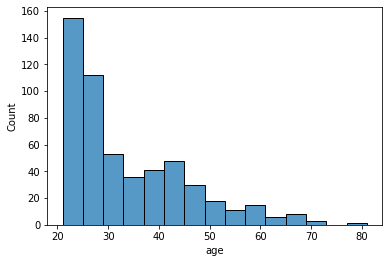

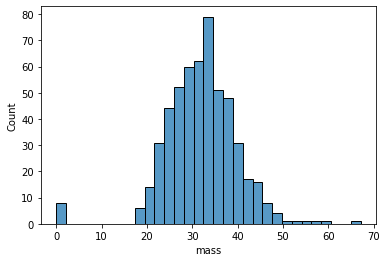

In [56]:
# Checando as distribuições
sns.histplot(X_train['age'])
plt.show()
sns.histplot(X_train['mass'])
plt.show()

Agora usaremos o scikit-learn para aplicar o MinMaxScaler, RobustScaler e StandardScaler.

In [57]:
min_max_scaler = MinMaxScaler(feature_range = (0, 1))

Agora precisamos usar os métodos `fit()` e `transform()`. O `fit()` irá realizar a extração do que precisa para realizar a transformação, no caso do MinMax, equivale à extrair os valores mínimo e máximo. Em seguida, usamos o método `transform()` para realizar a transformação.

Iremos aplicar o MinMax na features `mass`.

In [58]:
X_train.mass.describe()

count    537.000000
mean      31.963873
std        7.819653
min        0.000000
25%       27.500000
50%       32.000000
75%       36.500000
max       67.100000
Name: mass, dtype: float64

In [59]:
min_max_scaler.fit(X_train[['mass']])

MinMaxScaler()

In [60]:
min_max_scaler.transform(X_train[['mass']])

array([[0.49925484],
       [0.43070045],
       [0.40983607],
       [0.5752608 ],
       [0.30402385],
       [0.45454545],
       [0.42324888],
       [0.35320417],
       [0.52011923],
       [0.29210134],
       [0.4485842 ],
       [0.3681073 ],
       [0.59165425],
       [0.31445604],
       [0.4709389 ],
       [0.52160954],
       [0.4366617 ],
       [0.47690015],
       [0.50074516],
       [0.41132638],
       [0.41728763],
       [0.56184799],
       [0.48733234],
       [0.46050671],
       [0.32637854],
       [0.37406855],
       [0.37257824],
       [0.48137109],
       [0.49627422],
       [0.31594635],
       [0.52757079],
       [0.50968703],
       [0.54843517],
       [0.64679583],
       [0.45901639],
       [0.58271237],
       [0.42771982],
       [0.46497765],
       [0.56780924],
       [0.47690015],
       [0.47690015],
       [0.60804769],
       [0.54694486],
       [0.49627422],
       [0.59463487],
       [0.51862891],
       [0.8852459 ],
       [0.381

Podemos usar também o método `fit_transform()` para realizar a extração dos parâmetros e aplicar a transformação.

In [61]:
mass_new = min_max_scaler.fit_transform(X_train[['mass']])

Novos valores máximo e mínimo:

In [62]:
mass_new.min(), mass_new.max()

(0.0, 1.0)

In [63]:
mass_new = pd.DataFrame(mass_new, columns = ['mass'])

In [64]:
mass_new.describe()

,mass
count,537.000000
mean,0.476362
std,0.116537
min,0.000000
25%,0.409836
50%,0.476900
75%,0.543964
max,1.000000


Agora vamos aplicar o StandardScaler.

In [65]:
# aplica a transformação em todo o conjunto de dados
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_train_standard = pd.DataFrame(X_train_standard, columns = X_train.columns)

In [66]:
X_train_standard.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,-1.736662e-17,-6.202363e-19,-2.860840e-16,-8.838368e-17,2.305212e-16,3.441278e-16,5.954269e-17,-2.516092e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.137138e+00,-3.686267e+00,-3.626219e+00,-1.346719e+00,-6.928023e-01,-4.091444e+00,-1.154989e+00,-1.030465e+00
25%,-8.375094e-01,-6.788854e-01,-2.825322e-01,-1.346719e+00,-6.928023e-01,-5.713854e-01,-6.748518e-01,-7.762806e-01
50%,-2.382522e-01,-1.320888e-01,1.354286e-01,1.849184e-01,-3.362530e-01,4.624286e-03,-2.967439e-01,-3.526397e-01
75%,6.606336e-01,6.577285e-01,5.533894e-01,6.954643e-01,3.606386e-01,5.806339e-01,4.024556e-01,6.640986e-01
max,3.956548e+00,2.358874e+00,2.747684e+00,4.971286e+00,6.162667e+00,4.497500e+00,5.873017e+00,4.053226e+00


In [67]:
X_train_standard

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.537881,-0.982661,1.075840,0.567828,-0.692802,0.196628,-0.512806,0.748827
1,0.061376,0.748861,0.814615,0.376373,0.117537,-0.392182,-0.821894,-0.522096
2,1.859148,-0.314354,0.030938,0.376373,-0.692802,-0.571385,-0.965935,0.579370
3,-0.837509,-0.678885,0.135429,0.567828,-0.546941,0.849438,-0.152703,-1.030465
4,-0.837509,-1.529458,-1.118454,-0.197991,-0.076944,-1.480201,-0.419779,-0.945737
...,...,...,...,...,...,...,...,...
532,-0.837509,0.353953,1.702782,0.440191,0.441673,0.107026,-0.686855,1.003011
533,0.061376,0.232442,-0.491513,-0.580900,1.179081,-0.571385,0.192396,-0.183183
534,-0.238252,-0.162466,0.239919,-0.389446,0.158054,-0.724988,-1.067964,-0.776281
535,-0.837509,-1.013039,-2.058866,1.333647,0.109434,2.948674,0.099369,-0.606824


In [68]:
X_train

,preg,plas,pres,skin,insu,mass,pedi,age
491,2,89,90,30,0,33.5,0.292,42
69,4,146,85,27,100,28.9,0.189,27
667,10,111,70,27,0,27.5,0.141,40
566,1,99,72,30,18,38.6,0.412,21
97,1,71,48,18,76,20.4,0.323,22
...,...,...,...,...,...,...,...,...
369,1,133,102,28,140,32.8,0.234,45
320,4,129,60,12,231,27.5,0.527,31
527,3,116,74,15,105,26.3,0.107,24
125,1,88,30,42,99,55.0,0.496,26


Vamos verificar a distribuição da feature mass antes e após a transformação.

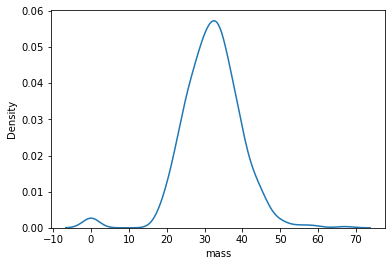

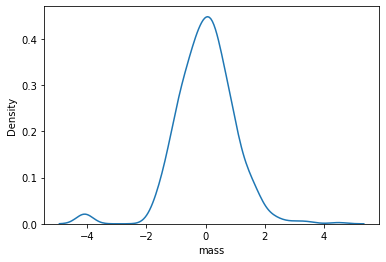

In [28]:
sns.kdeplot(X_train['mass'])
plt.show()
sns.kdeplot(X_train_standard['mass'])
plt.show()

Qual a diferença entre as distribuições antes e após a transformação?

Qual o melhor transformador?

Agora iremos aplicar o transformador RobustScaler.

In [22]:
robust_scaler = RobustScaler()
train = robust_scaler.fit_transform(X_train)
test = robust_scaler.transform(X_test)
X_train = pd.DataFrame(train, columns = X_train.columns)
X_test = pd.DataFrame(test, columns=X_test.columns)

In [23]:
X_train.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.159032,0.098823,-0.162011,-0.090549,0.319195,-0.004014,0.275450,0.244824
std,0.668115,0.748857,1.197400,0.490128,0.950155,0.868850,0.929106,0.694909
min,-0.600000,-2.659091,-4.500000,-0.750000,-0.338462,-3.555556,-0.796657,-0.470588
25%,-0.400000,-0.409091,-0.500000,-0.750000,-0.338462,-0.500000,-0.350975,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.590909,0.500000,0.250000,0.661538,0.500000,0.649025,0.705882
max,2.800000,1.863636,3.125000,2.343750,6.169231,3.900000,5.727019,3.058824


In [24]:
reg_log = LogisticRegression()


In [25]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None]
}

grid_reg_log = GridSearchCV(
    estimator = reg_log,
    param_grid = param_grid,
    scoring = 'roc_auc',
    refit = 100,
    n_jobs = -1,
    verbose = 3
)

In [26]:
grid_reg_log.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             refit=100, scoring='roc_auc', verbose=3)

In [27]:
grid_reg_log.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [28]:
y_pred_proba_train = grid_reg_log.predict_proba(X_train)[:, 1]
y_pred_proba_test = grid_reg_log.predict_proba(X_test)[:, 1]
y_pred_train = grid_reg_log.predict(X_train)
y_pred_test = grid_reg_log.predict(X_test)

In [32]:
# métrica no treino e test
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
roc_auc_train , roc_auc_test

(0.8451176361040413, 0.8163314176245211)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_test, y_test))

                 precision    recall  f1-score   support

tested_negative       0.93      0.75      0.83       179
tested_positive       0.48      0.81      0.60        52

       accuracy                           0.76       231
      macro avg       0.71      0.78      0.72       231
   weighted avg       0.83      0.76      0.78       231



In [186]:
from skopt import BayesSearchCV

In [187]:
clf_knn = KNeighborsClassifier()
cv = StratifiedKFold(
    n_splits=5,
    random_state=SEED, 
    shuffle=True
)

# espaço de pesquisa de hiperparâmetros
param_distributions_knn = {
    'n_neighbors': np.arange(3, 15, 2),
    'p': np.arange(1, 5),
    'metric': ['minkowski', 'chebyshev'],
    'weights': ['uniform', 'distance']
}

# Bayesian Search
bayes_search = BayesSearchCV(
    estimator=clf_knn,
    search_spaces=param_distributions_knn,
    n_iter=50,
    random_state=SEED
)

# treino
bayes_search.fit(X_train, y_train)

BayesSearchCV(estimator=KNeighborsClassifier(), random_state=10,
              search_spaces={'metric': ['minkowski', 'chebyshev'],
                             'n_neighbors': array([ 3,  5,  7,  9, 11, 13]),
                             'p': array([1, 2, 3, 4]),
                             'weights': ['uniform', 'distance']})

In [189]:
y_pred_proba_train = bayes_search.predict_proba(X_train)[:, 1]
y_pred_proba_test = bayes_search.predict_proba(X_test)[:, 1]
y_pred_train = bayes_search.predict(X_train)
y_pred_test = bayes_search.predict(X_test)

In [190]:
# métrica no treino e test
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
roc_auc_train , roc_auc_test

(1.0, 0.7720306513409962)

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       180
           1       0.44      0.75      0.55        51

    accuracy                           0.73       231
   macro avg       0.67      0.74      0.68       231
weighted avg       0.81      0.73      0.75       231



In [69]:
X_train_robust

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.2,-0.636364,1.1250,0.18750,-0.338462,0.166667,-0.200557,0.764706
1,0.2,0.659091,0.8125,0.09375,0.430769,-0.344444,-0.487465,-0.117647
2,1.4,-0.136364,-0.1250,0.09375,-0.338462,-0.500000,-0.621170,0.647059
3,-0.4,-0.409091,0.0000,0.18750,-0.200000,0.733333,0.133705,-0.470588
4,-0.4,-1.045455,-1.5000,-0.18750,0.246154,-1.288889,-0.114206,-0.411765
...,...,...,...,...,...,...,...,...
532,-0.4,0.363636,1.8750,0.12500,0.738462,0.088889,-0.362117,0.941176
533,0.2,0.272727,-0.7500,-0.37500,1.438462,-0.500000,0.454039,0.117647
534,0.0,-0.022727,0.1250,-0.28125,0.469231,-0.633333,-0.715877,-0.294118
535,-0.4,-0.659091,-2.6250,0.56250,0.423077,2.555556,0.367688,-0.176471


## Testando Modelos

In [138]:
from sklearn.ensemble import RandomForestClassifier


In [139]:
# Bibliotecas de métricas
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, matthews_corrcoef

In [140]:
model = RandomForestClassifier()
logist_model = LogisticRegression()

In [141]:
model.fit(X_train, y_train)
logist_model.fit(X_train, y_train)

LogisticRegression()

In [142]:
y_pred = logist_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7402597402597403

In [143]:
confusion_matrix(y_pred, y_test)

array([[128,  44],
       [ 16,  43]], dtype=int64)

In [144]:
matthews_corrcoef(y_pred, y_test)

0.42570635726784867

In [145]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       172
           1       0.49      0.73      0.59        59

    accuracy                           0.74       231
   macro avg       0.69      0.74      0.70       231
weighted avg       0.79      0.74      0.75       231



### XGBClassifier

In [162]:
from xgboost import XGBClassifier

In [163]:
xgbc = XGBClassifier(random_state=145, learning_rate=0.01)

In [164]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=145, ...)

In [165]:
predict_x = xgbc.predict(X_test)

In [166]:
accuracy_score(predict_x, y_test)

0.7619047619047619

In [167]:
print(classification_report(predict_x, y_test))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       169
           1       0.54      0.76      0.63        62

    accuracy                           0.76       231
   macro avg       0.72      0.76      0.73       231
weighted avg       0.80      0.76      0.77       231



### LGBMClassifier

In [168]:
from lightgbm import LGBMClassifier

In [169]:
lgbm = LGBMClassifier()

In [170]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [171]:
pred = lgbm.predict(X_test)

In [172]:
accuracy_score(pred, y_test)

0.7489177489177489

In [173]:
confusion_matrix(pred, y_test)

array([[123,  37],
       [ 21,  50]], dtype=int64)

In [174]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       160
           1       0.57      0.70      0.63        71

    accuracy                           0.75       231
   macro avg       0.71      0.74      0.72       231
weighted avg       0.77      0.75      0.76       231



**Variáveis qualitativas**

Agora vamos trabalhar com outro dataset para ilustrar os conceitos para o tratamento de features qualitativas.

In [30]:
titanic = pd.read_csv('titanic_reduced.csv')

Observe que precisamos tratar adicionalmente algumas variáveis qualitativas. Pclass refere-se a classe que o passageiro viajou, embarked é o porto que o passageiro embarcou, sex o sexo do passageiro e survived é se o passageiro sobreviveu ou não.

In [31]:
titanic.head()

,Embarked,Age,Sex,Pclass,Survived
0,S,22.0,male,3rd,0
1,C,38.0,female,1st,1
2,S,26.0,female,3rd,1
3,S,35.0,female,1st,1
4,S,35.0,male,3rd,0


In [35]:
titanic.isna().sum()

Embarked    0
Age         0
Sex         0
Pclass      0
Survived    0
dtype: int64

In [36]:
# vamos remover nan
titanic.dropna(inplace = True)

Agora vamos separar os dados em treino e teste:

In [37]:
SEED = 10
X = titanic.drop(columns = ['Survived'])
y = titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

Já conhecemos o One-Hot-Encoder da função `pd.get_dummies()`.

* Se tivermos features com muitos níveis podemos incorrer no problema de alta dimensionalidade, o que pode ser um problema em termos de processamento.

In [38]:
# cria uma dummy para o sexo feminino
pd.get_dummies(X_train.Sex, drop_first = True)

,male
736,0
679,1
772,0
518,0
541,0
...,...
462,1
399,0
668,1
156,0


In [39]:
cols_cat = X_train.select_dtypes(object).columns.tolist()
one_hot_encoder = OneHotEncoder(sparse=False, drop = 'first')
X_train_cat = one_hot_encoder.fit_transform(X_train[cols_cat])
X_train_cat = pd.DataFrame(X_train_cat, columns = one_hot_encoder.get_feature_names())

In [40]:
X_train_cat.head()

,x0_Q,x0_S,x1_male,x2_2nd,x2_3rd
0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0


Mas o processamento que fizemos para a coluna Pclass foi correto? Quando trabalharmos com features que sejam categóricas ordinais podemos usar o OrdinalEncoder. Para cada nível será atribuído um número, sendo que precisaremos estabelecer essa ordem.

In [70]:
X_train['Pclass'].unique()

array(['3rd', '1st', '2nd'], dtype=object)

In [41]:
levels = ['1st', '2nd', '3rd']
levels = np.array(levels).reshape(1, len(levels))
levels = list(levels)
ordinal_encoder = OrdinalEncoder(categories = levels)
pclass = X_train.loc[:, ['Pclass']]
pclass_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(pclass), columns = ['Pclass'])

Agora vejamos a distribuição de frequências:

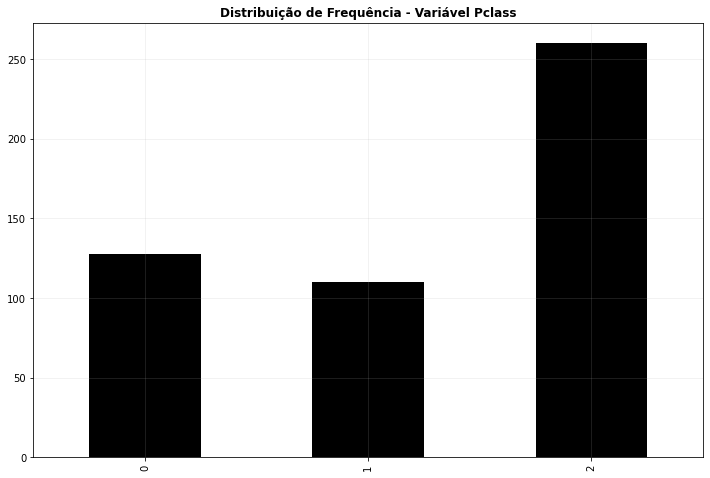

In [42]:
pclass_ordinal.Pclass.astype(int).value_counts().sort_index().plot(kind = 'bar', color ='k', figsize = (12, 8))
plt.title('Distribuição de Frequência - Variável Pclass', weight = 'bold')
plt.grid(alpha = 0.2)

In [43]:
X_train

,Embarked,Age,Sex,Pclass
736,S,48.0,female,3rd
679,C,36.0,male,1st
772,S,57.0,female,2nd
518,S,36.0,female,2nd
541,S,9.0,female,3rd
...,...,...,...,...
462,S,47.0,male,1st
399,S,28.0,female,2nd
668,S,43.0,male,3rd
156,Q,16.0,female,3rd


## **Referências**


[Top 10 model performance metrics for classification ML models](https://towardsdatascience.com/top-10-model-evaluation-metrics-for-classification-ml-models-a0a0f1d51b9)

[A Practical Guide to Seven Essential Performance Metrics for Classification using Scikit-Learn](https://towardsdatascience.com/a-practical-guide-to-seven-essential-performance-metrics-for-classification-using-scikit-learn-2de0e0a8a040)

[Popular Evaluation Metrics for Classification with Code](https://towardsdatascience.com/popular-evaluation-metrics-for-classification-with-code-580fa0d4eb20)


[20 Popular Machine Learning Metrics. Part 1: Classification & Regression Evaluation Metrics](https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce)